<a href="https://colab.research.google.com/github/musharraf3/Heart-Disease-Prediction/blob/master/heart_disease_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 92kB/s 
     |████████████████████████████████| 491kB 49.2MB/s 
     |████████████████████████████████| 3.2MB 25.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


[View in Colaboratory](https://colab.research.google.com/github/cpoptic/CNN-to-detect-heart-disease/blob/master/breast_cancer.ipynb)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [0]:
import numpy as np
from sklearn import preprocessing, model_selection
import pandas as pd
import sklearn


In [0]:
df = pd.read_csv('/content/heart_disease.csv')

In [9]:
df.isnull().sum()

age          0
sex          0
cp          10
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [10]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,NaN,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
df.shape

(303, 14)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,NaN,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
from sklearn.impute import SimpleImputer
imput = SimpleImputer(missing_values=np.nan, strategy='mean')
df = list(imput.fit_transform(df))
import math
for i in range(303):
    for j in range(14):
        df[i][j] = math.ceil(df[i][j])

In [0]:
df = pd.DataFrame(df)

In [0]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',6: 'restecg',7: 'thalach',8: 'exang',9: 'oldpeak',10: 'slope',11: 'ca',12: 'thal',13:'target'})

In [0]:
X = df.iloc[:,:-1]

In [0]:
Y = df.iloc[:,-1]

In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(Y)

In [0]:
scaler = preprocessing.MinMaxScaler()

In [20]:
X = scaler.fit_transform(X)
X

array([[0.70833333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

## Implementing ANOVA

In [0]:
#Remove Constant, Quasi Constant, and Correlated Features

In [0]:
#df_top8 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)
#constant_filter = VarianceThreshold(threshold=0.01)
#constant_filter.fit(X_train)
#X_train_filter = constant_filter.transform(X_train)
#X_test_filter = constant_filter.transform(X_test)

In [23]:
X_train.shape, X_test.shape, Y_test.shape

((227, 13), (76, 13), (76,))

In [24]:
#F-Test
sel = f_classif(X_train, Y_train)
sel

(array([10.01122466, 15.2937101 , 53.1501392 ,  4.5938387 ,  1.85613605,
         0.07258973,  2.91978815, 40.4382086 , 58.39522336, 42.29736973,
        29.04986155, 31.48269992, 37.66914405]),
 array([1.77070746e-03, 1.21859654e-04, 5.20130583e-12, 3.31601110e-02,
        1.74433619e-01, 7.87849708e-01, 8.88783176e-02, 1.11823526e-09,
        6.13286031e-13, 5.00833175e-10, 1.77691930e-07, 5.88323915e-08,
        3.74393034e-09]))

In [0]:
p_values = pd.Series(sel[1])
#X_train = pd.DataFrame(X_train)
#p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)
#p_values.plot.bar(figsize = (16, 5))

In [26]:
p_values = p_values[p_values<0.05]
p_values.index

Int64Index([8, 2, 9, 7, 12, 11, 10, 1, 0, 3], dtype='int64')

In [0]:
X_train_p = X_train[p_values.index]
X_test_p = X_test[p_values.index]

## Creating the model and training

In [29]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
import tensorflow as tf 
from IPython.display import clear_output


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [30]:
model = Sequential()

In [31]:
model.add(Dense(13, activation='sigmoid', input_shape=(13,)))
model.add(Dense(26, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(52, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(39, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)


In [0]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

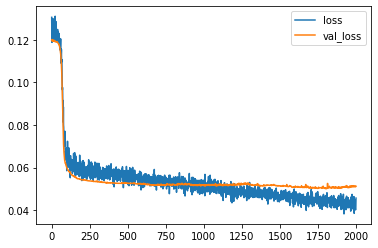

In [34]:
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('/content/mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

training = model.fit(X_train,Y_train,batch_size=30,epochs=2000,validation_data=(X_test, Y_test),callbacks=[plot_losses,mcp_save])

In [35]:
from matplotlib import pyplot as plt
history = model.fit(X, Y,validation_split = 0.25, epochs=2000, batch_size=30)
# history = model.fit(X_train, y_train, nb_epoch=10, validation_data=(X_test, y_test), shuffle=True)



Train on 227 samples, validate on 76 samples
Epoch 1/2000
227/227 [==============================] - 0s 82us/step - loss: 0.0404 - val_loss: 0.0660
Epoch 2/2000
227/227 [==============================] - 0s 81us/step - loss: 0.0371 - val_loss: 0.0753
Epoch 3/2000
227/227 [==============================] - 0s 71us/step - loss: 0.0356 - val_loss: 0.0820
Epoch 4/2000
227/227 [==============================] - 0s 71us/step - loss: 0.0352 - val_loss: 0.0877
Epoch 5/2000
227/227 [==============================] - 0s 70us/step - loss: 0.0356 - val_loss: 0.0901
Epoch 6/2000
227/227 [==============================] - 0s 71us/step - loss: 0.0362 - val_loss: 0.0918
Epoch 7/2000
227/227 [==============================] - 0s 72us/step - loss: 0.0357 - val_loss: 0.0889
Epoch 8/2000
227/227 [==============================] - 0s 68us/step - loss: 0.0354 - val_loss: 0.0845
Epoch 9/2000
227/227 [==============================] - 0s 71us/step - loss: 0.0367 - val_loss: 0.0842
Epoch 10/2000
227/227 [=====

In [36]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)

history = model.fit(X_train, Y_train, epochs=2000, batch_size=30, validation_data=(X_test, Y_test), shuffle=True)

Train on 227 samples, validate on 76 samples
Epoch 1/2000
227/227 [==============================] - 0s 2ms/step - loss: 0.0424 - val_loss: 0.0662
Epoch 2/2000
227/227 [==============================] - 0s 72us/step - loss: 0.0442 - val_loss: 0.0643
Epoch 3/2000
227/227 [==============================] - 0s 70us/step - loss: 0.0478 - val_loss: 0.0632
Epoch 4/2000
227/227 [==============================] - 0s 69us/step - loss: 0.0404 - val_loss: 0.0626
Epoch 5/2000
227/227 [==============================] - 0s 84us/step - loss: 0.0436 - val_loss: 0.0622
Epoch 6/2000
227/227 [==============================] - 0s 73us/step - loss: 0.0442 - val_loss: 0.0623
Epoch 7/2000
227/227 [==============================] - 0s 67us/step - loss: 0.0415 - val_loss: 0.0617
Epoch 8/2000
227/227 [==============================] - 0s 66us/step - loss: 0.0405 - val_loss: 0.0618
Epoch 9/2000
227/227 [==============================] - 0s 70us/step - loss: 0.0420 - val_loss: 0.0623
Epoch 10/2000
227/227 [======

In [0]:
from keras.models import load_model

model1 = load_model('/content/mdl_wts.hdf5')


In [42]:
loss = model1.evaluate(X_test, Y_test, verbose=1, batch_size=30)

76/76 [==============================] - 0s 2ms/step


In [43]:
loss

0.05010317334611165

In [44]:
print("Final accuracy is {}".format(100-loss*100))

Final accuracy is 94.98968266538884


In [47]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=2).fit(X_train, Y_train)
y_test_svm = clf.predict(X_test)
print("Accuracy using SVM is:",clf.score(X_test, Y_test)*100)

Accuracy using SVM is: 85.52631578947368
